In [75]:
import pandas as pd

import numpy as np
from scipy.stats import norm
import queue
from ctypes import string_at
from sys import getsizeof
import ctypes
from binascii import hexlify
import math
from collections import defaultdict
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#以上操作导入包

In [76]:
df_train = pd.read_csv(r"C:\Users\fulian\Desktop\trainada.csv")
df_train["weight"] = 1/df_train.shape[0]
df_train["bucket"] = ""
print(df_train)
original = df_train

       密度    含糖率  好瓜    weight bucket
0   0.697  0.460   1  0.058824       
1   0.774  0.376   1  0.058824       
2   0.634  0.264   1  0.058824       
3   0.608  0.318   1  0.058824       
4   0.556  0.215   1  0.058824       
5   0.403  0.237   1  0.058824       
6   0.481  0.149   1  0.058824       
7   0.437  0.211   1  0.058824       
8   0.666  0.091   0  0.058824       
9   0.243  0.267   0  0.058824       
10  0.245  0.057   0  0.058824       
11  0.343  0.099   0  0.058824       
12  0.639  0.161   0  0.058824       
13  0.657  0.198   0  0.058824       
14  0.360  0.370   0  0.058824       
15  0.593  0.042   0  0.058824       
16  0.719  0.103   0  0.058824       


In [77]:
#list1 = []
#list2 = []
def featrues_value(df):
  list1 = []
  list2 = []
  for i in range(df.shape[0]):
      list1.append(df.iat[i,0])
      list2.append(df.iat[i,1])
  return list1,list2


In [78]:
def midu(a):
    list_p = []
    a.sort()
    for i in range(len(a) - 1):
        list_p.append((a[i] + a[i + 1])/2)
    return list_p
s1,s2 = featrues_value(df_train)
split1 = midu(s1)
split2 = midu(s2)
print(split1)
print(split2)

[0.244, 0.29400000000000004, 0.35150000000000003, 0.3815, 0.42000000000000004, 0.45899999999999996, 0.5185, 0.5745, 0.6005, 0.621, 0.6365000000000001, 0.648, 0.6615, 0.6815, 0.708, 0.7464999999999999]
[0.0495, 0.074, 0.095, 0.101, 0.126, 0.155, 0.1795, 0.20450000000000002, 0.213, 0.22599999999999998, 0.2505, 0.2655, 0.2925, 0.344, 0.373, 0.41800000000000004]


In [79]:
def mode(df,best,i):
    s1 = 0
    s = 0
    for j in range(df.shape[0]):
        if df.iat[j,i] < best :
            s += 1
            if df.iat[j,2] == 1:
              s1 += 1
    if s1 > s - s1:
        return 1
    else:
        return 0


In [80]:
def error_ratio(df,split,col):
    a = mode(df,split,col)
    num = 0
    for i in range(df.shape[0]):
        if df.iat[i,col] < split and df.iat[i,2] != a:
            num = num +df.iat[i,3]
        elif df.iat[i,col] >=split and df.iat[i,2] ==a:
            num = num +df.iat[i,3]
    return num

In [81]:
def Split_choose(df,x1,x2):
    min = 1000
    new_split = 0
    col = 0
    for i in range(len(x1)):
        if error_ratio(df,x1[i],0) < min:
            new_split = x1[i]
            col = 0
            min = error_ratio(df,x1[i],0)
    for i in range(len(x2)):
        if error_ratio(df,x2[i],1) < min:
            new_split = x2[i]
            col = 1
            min = error_ratio(df,x2[i],1)
    return new_split,col


In [82]:
def update_weight(df,split,col):
    miss = 0
    wrong_index = []
    a = mode(df,split,col)
    for i in range(df.shape[0]):
        if df.iat[i,col] < split and df.iat[i,2] != a:
            miss = miss + df.iat[i,3]
            wrong_index.append(i)
        if df.iat[i,col] >= split and df.iat[i,2] == a:
            miss = miss + df.iat[i,3]
            wrong_index.append(i)
    Importance = 1/2*np.log((1-miss)/miss)
    for i in range(df.shape[0]):
        if i in wrong_index:
            df.iat[i,3] = df.iat[i,3] * math.exp(Importance)
            
        elif i not in wrong_index:
            df.iat[i,3] = df.iat[i,3] * math.exp(-Importance)
            
    return df



In [83]:
set1 = set()
set2 = set()
for i in range(7):
    splitfinal,col = Split_choose(df_train,split1,split2)
    df_train = update_weight(df_train,splitfinal,col)
    if col == 0:
        set1.add(splitfinal)
    elif col == 1:
        set2.add(splitfinal)
    
    
    

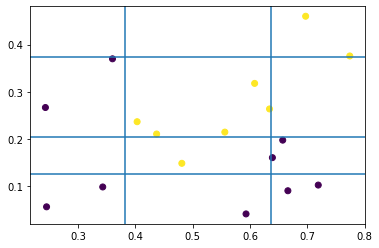

In [84]:
fig, ax = plt.subplots()
for u in set1:
  plt.axvline(u)
for v in set2:
    plt.axhline(v)
ax.scatter(original["密度"],original["含糖率"],c=original["好瓜"])